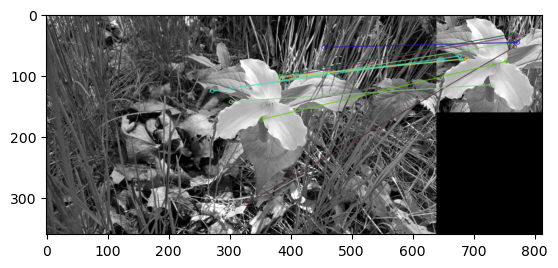

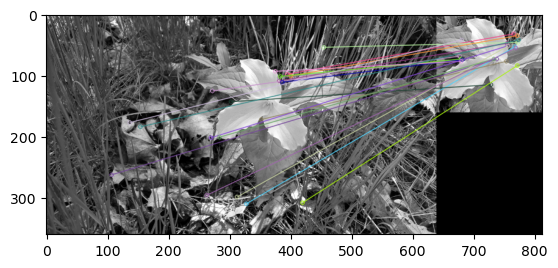

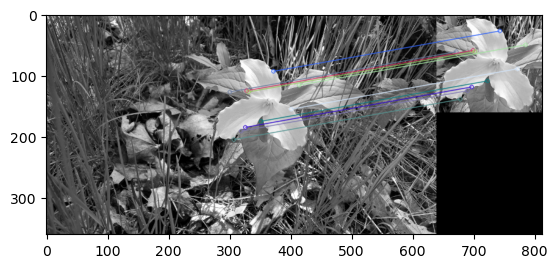

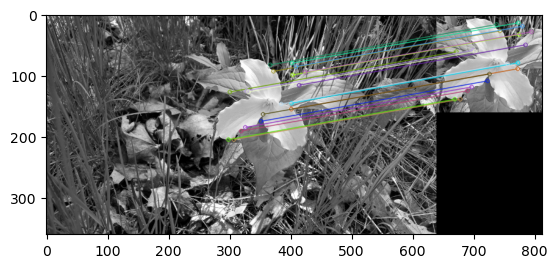

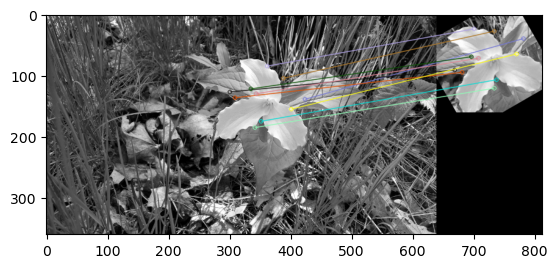

True

In [65]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def find_good_knn_matches(knn_matches):
    good_matches = []
    ratio_thresh = 0.7
    for i, (m, n) in enumerate(knn_matches):
        if m.distance < ratio_thresh * n.distance:
            good_matches.append(m)
    return good_matches

img1 = cv.imread('Trillium_s.jpg', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('Trillium_t.jpg', cv.IMREAD_GRAYSCALE)

# BruteForceMatcher
# Initiate object detector
orb = cv.ORB_create()

# Find the keypoints and descriptors
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Create BruteForceMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(des1, des2)

# Sort them in the order of their distance
matches = sorted(matches, key = lambda x:x.distance)

img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS) 
img4 = cv.drawMatches(img1,kp1,img2,kp2,matches[:20], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS) 
plt.imshow(img3), plt.show()
plt.imshow(img4), plt.show()
cv.imwrite('bf_matcher_top10.jpg', img3)
cv.imwrite('bf_matcher_top20.jpg', img4)


# FlannBasedMatcher
# Detect the keypoints using SIFT detector, compute descriptors 
detector = cv.SIFT_create()
kp3, des3 = detector.detectAndCompute(img1, None)
kp4, des4 = detector.detectAndCompute(img2, None)

# Matching descriptor vectors with a Flann based matcher
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=100) #Cross check arg can be passed empty dictionary
matcher = cv.FlannBasedMatcher(index_params)
knn_matches = matcher.knnMatch(des3, des4, k=2) 

# Filter matches using the Lowe's ratio test
good_matches = find_good_knn_matches(knn_matches)
good_matches = sorted(good_matches, key = lambda x:x.distance)

img5 = cv.drawMatches(img1, kp3, img2, kp4, good_matches[:10], None, flags=2)
img6 = cv.drawMatches(img1, kp3, img2, kp4, good_matches[:20], None, flags=2)
plt.imshow(img5), plt.show()
plt.imshow(img6), plt.show()
cv.imwrite('fnn_matcher_top10.jpg', img5)
cv.imwrite('fnn_matcher_top20.jpg', img6)

# Rotated image matching using Flann Based
height, width = img2.shape[0:2]
rotationMatrix = cv.getRotationMatrix2D((width/2, height/2), float(30), 1)
rotated_img = cv.warpAffine(img2, rotationMatrix, (width, height))

kp5, des5 = detector.detectAndCompute(rotated_img, None) 
rotated_knn_matches = matcher.knnMatch(des3, des5, k=2)
rotated_good_matches = find_good_knn_matches(rotated_knn_matches)
rotated_good_matches = sorted(rotated_good_matches, key = lambda x:x.distance)
img7 = cv.drawMatches(img1, kp3, rotated_img, kp5, rotated_good_matches[:10], None, flags=2)
plt.imshow(img7), plt.show()
cv.imwrite('fnn_matcher_rotated_top10.jpg', img7)
